In [2]:
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
from adjustText import adjust_text

## Load country data from GeoPackage

In [13]:
df = gpd.read_file('../data/world_boundaries_with_stats_centroid.gpkg')
total_edits = (df["sum_edits_corporate"].sum() + df["sum_edits_non_corporate"].sum()) / 1_000_000
print(f"total edits: {total_edits} Million")

total_corporate_edits = df["sum_edits_corporate"].sum() / 1_000_000
print(f"total corporate edits: {total_corporate_edits} Million")

total edits: 1097.518715 Million
total corporate edits: 130.170126 Million


In [14]:
df = df[
    (df["share_sum_edits_corporate"] > 0.10)
    &
    (df["sum_edits_corporate"] > 100_000)
]

display(df.columns)
display(len(df))

Index(['ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH',
       'NAME_EN', 'country_iso_a3', 'post_t1_avg_monthly_edits_non_corporate',
       'post_t1_avg_monthly_edits_corporate',
       'post_t1_avg_monthly_contributors_non_corporate',
       'post_t1_avg_monthly_contributors_corporate',
       'post_t1_sum_edits_non_corporate', 'post_t1_sum_edits_corporate',
       'pre_t0_avg_monthly_edits_non_corporate',
       'pre_t0_avg_monthly_edits_corporate',
       'pre_t0_avg_monthly_contributors_non_corporate',
       'pre_t0_avg_monthly_contributors_corporate',
       'pre_t0_sum_edits_non_corporate', 'pre_t0_sum_edits_corporate',
       't0_avg_monthly_edits_non_corporate', 't0_avg_monthly_edits_corporate',
       't0_avg_monthly_contributors_non_corporate',
       't0_avg_monthly_contributors_corporate', 't0_sum_edits_non_corporate',
       't0_sum_edits_corporate', 't1_avg_monthly_edits_non_corporate',
       't1_avg_monthly_edits_corporate',
       't1_avg_monthly

36

## share edits for selected countries

In [15]:
corporate_edits_selection = df["sum_edits_corporate"].sum() / 1_000_000
share_corporate_edits_selection = corporate_edits_selection/ total_corporate_edits
print(share_corporate_edits_selection)

0.8828464835318665


## Inspect column values for scatter plot

In [3]:
columns = [
    "country_iso_a3",
    "difference_avg_monthly_edits_non_corporate",
    "difference_avg_monthly_edits_corporate",
    "normalized_difference_avg_monthly_edits_non_corporate",
    "normalized_difference_avg_monthly_edits_corporate"
]

display(df[columns].sort_values("difference_avg_monthly_edits_corporate"))

,country_iso_a3,difference_avg_monthly_edits_non_corporate,difference_avg_monthly_edits_corporate,normalized_difference_avg_monthly_edits_non_corporate,normalized_difference_avg_monthly_edits_corporate
1,MEX,7816.840404,-113856.755556,0.127804,-0.796785
41,USA,58943.532110,-61210.486239,0.044259,-0.337660
2,EGY,-19911.172028,-43165.333080,-0.729245,-0.768136
21,PHL,-94664.572844,-37365.619464,-0.486636,-0.517102
5,VNM,-13560.838585,-30547.338936,-0.432403,-0.762426
16,BRA,-5236.444004,-14350.951057,-0.061454,-0.352760
7,MYS,-6219.640605,-13005.737579,-0.315576,-0.553529
0,URY,95.286425,-10086.083258,0.031021,-0.848499
29,ZAF,-4293.325684,-4926.337945,-0.120629,-0.519788
49,UKR,-1103.681756,-2799.090927,-0.022066,-0.492774


## Scatter Plot for Normalized Difference

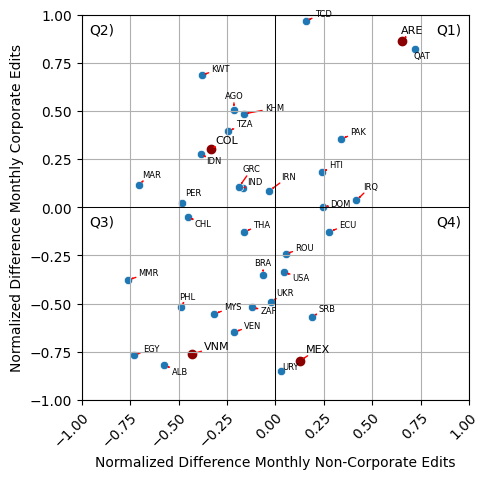

In [28]:
y=df["normalized_difference_avg_monthly_edits_corporate"]
x=df["normalized_difference_avg_monthly_edits_non_corporate"]
n = df['country_iso_a3']


fig, ax = plt.subplots(figsize=(5, 5))
ax.grid()
sns.scatterplot(
    data=df,
    y="normalized_difference_avg_monthly_edits_corporate",
    x="normalized_difference_avg_monthly_edits_non_corporate",
)



ax.set_ylabel('Normalized Difference Monthly Corporate Edits', fontsize = 10)
ax.set_xlabel('Normalized Difference Monthly Non-Corporate Edits', fontsize = 10)

ax.text(
    0.915, 0.98, 'Q1)', 
    horizontalalignment='left', 
    verticalalignment='top', 
    transform=ax.transAxes, 
    fontsize = 10, 
    backgroundcolor = 'white'
)
ax.text(
    0.02, 0.98, 'Q2)',
    horizontalalignment='left', 
    verticalalignment='top', 
    transform=ax.transAxes, 
    fontsize = 10, 
    backgroundcolor = 'white'
)
ax.text(
    0.02, 0.48, 'Q3)', 
    horizontalalignment='left', 
    verticalalignment='top', 
    transform=ax.transAxes, 
    fontsize = 10,
    backgroundcolor = 'white'
)
ax.text(
    0.915, 0.48, 'Q4)', 
    horizontalalignment='left', 
    verticalalignment='top', 
    transform=ax.transAxes, 
    fontsize = 10, 
    backgroundcolor = 'white'
)


country_hex = ['ARE', 'COL', 'MEX', 'VNM'] 
for name in country_hex:
    index = df[df['country_iso_a3'] == name].index.values[0]
    ax.scatter(x[index], y[index], color='darkred', label=name)

texts = []
for iso_a3_code in df["country_iso_a3"]:
    if iso_a3_code in country_hex:
        fontsize = 8
    else:
        fontsize = 6
    
    index = df[df['country_iso_a3'] == iso_a3_code].index.values[0]
    texts.append(ax.text(
        x[index],
        y[index],
        iso_a3_code,
        fontsize=fontsize
    ))

adjust_text(
    texts,
    expand=(2.5, 1.5), # expand text bounding boxes by 1.2 fold in x direction and 2 fold in y direction
    arrowprops=dict(arrowstyle='->', color='red') # ensure the labeling is clear by adding arrows
);


ax.axhline(0, color='black',linewidth=0.7)
ax.axvline(0, color='black',linewidth=0.7)

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)


plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha="right",
    rotation_mode="anchor"
)

plt.savefig(
    '../figures/fig3_country_trend_normalized_difference.png',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.1,
    facecolor='white'
)

plt.show()

## Scatter plot for absolute Difference

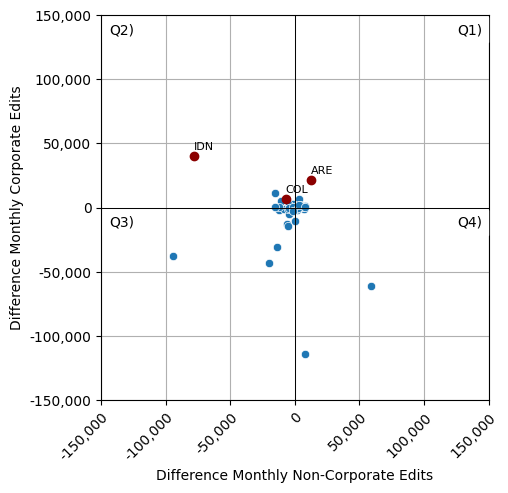

In [48]:
y=df["difference_avg_monthly_edits_corporate"]
x=df["difference_avg_monthly_edits_non_corporate"]
n = df['country_iso_a3']


fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(
    data=df,
    y="difference_avg_monthly_edits_corporate",
    x="difference_avg_monthly_edits_non_corporate",
)

ax.set_ylabel('Difference Monthly Corporate Edits', fontsize = 10)
ax.set_xlabel('Difference Monthly Non-Corporate Edits', fontsize = 10)

ax.text(0.92, 0.98, 'Q1)', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize = 10, backgroundcolor = 'white')
ax.text(0.02, 0.98, 'Q2)', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize = 10, backgroundcolor = 'white')
ax.text(0.02, 0.48, 'Q3)', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize = 10,backgroundcolor = 'white')
ax.text(0.92, 0.48, 'Q4)', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize = 10, backgroundcolor = 'white')


country_hex = ['IDN', 'ARE', 'COL',] 
for name in country_hex:
    index = df[df['country_iso_a3'] == name].index.values[0]
    ax.scatter(x[index], y[index], color='darkred', label=name)
    ax.annotate(name, (x[index], y[index] + 5000), fontsize=8)


ax.axhline(0, color='black',linewidth=0.7)
ax.axvline(0, color='black',linewidth=0.7)

ax.set_xlim(
    -150000,
    150000
)
ax.set_ylim(
    -150000,
    150000
)

ax.grid()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha="right",
    rotation_mode="anchor"
)

plt.savefig(
    '../figures/appendix_fig3_country_trend_absolute_difference.png',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.1,
    facecolor='white'
)

plt.show()